# 伽马分布

认识伽马分布之前，首先了解一下Gamma函数，这部分主要参考[LDA-math - 神奇的 Gamma 函数](https://cosx.org/2013/01/lda-math-gamma-function/)。

## Gamma函数

$\Gamma (x)=\int_0^{\infty}t^{x-1}e^{-t}dt$

这么个形式奇特的函数是怎么出现的呢？

数学家常常会做一些延拓工作，比如以前的从整数到实数，从实数到复数等等。1728年，哥德巴赫在考虑数列插值的问题，
通俗的说就是把数列的通项公式定义从整数集合延拓到实数集合，例如数列1,4,9,16,⋯ 可以用通项公式$n^2$自然的表达，即便 
n为实数的时候，这个通项公式也是良好定义的。

那么对于阶乘，整数的阶乘定义很清楚，那么如何定义实数的阶乘？过程本文不清楚，但是最后结果是：

丹尼尔贝努利发现下式m足够大时可近似表达阶乘。

$\frac{1⋅2⋅3⋅⋅⋅m}{(1+n)(2+n)⋅⋅⋅(m-1+n)}(m+\frac{n}{2})^{n-1} \to n!$

欧拉发现如下式所示的无穷级数可以表达阶乘。

$\displaystyle{\lim_{m \to \infty}} \frac{1⋅2⋅3⋅⋅⋅m}{(1+n)(2+n)⋅⋅⋅(m+n)}(m+n)^{n}=n！$

欧拉试算了$(\frac 1 2 )!=\frac{\sqrt\pi}{2}$，发现竟然有圆周率$\pi$出现，因此其猜测阶乘必与和圆相关的积分有关。因此就开始把阶乘表示为积分的形式。过程本文不明，结果如开头所示。

至于为什么$\Gamma (n)=(n-1)!$而不是$\Gamma (n)=n!$，这可能与Beta函数有关，这部分在Beta函数中再提及。

以下基于python绘制了Gamma函数的图像。

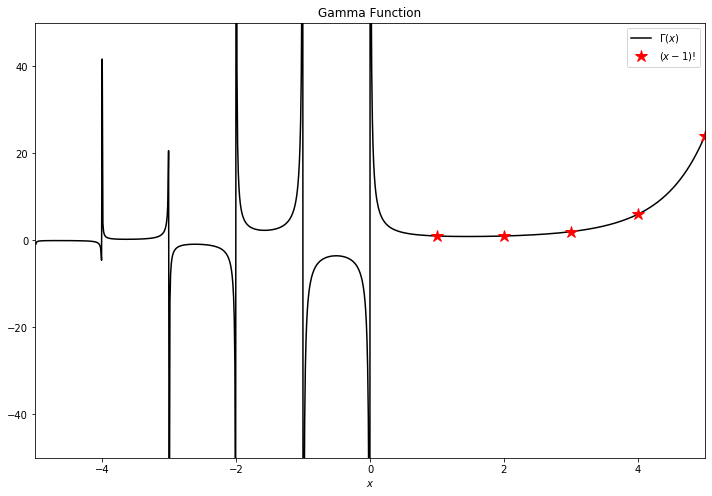

In [4]:
import numpy as np
from scipy.special import gamma
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,8))
# The Gamma function
x = np.linspace(-5, 5, 1000)
plt.plot(x, gamma(x), ls='-', c='k', label='$\Gamma(x)$')

# (x-1)! for x = 1, 2, ..., 6
x2 = np.linspace(1,6,6)
y = np.array([1, 1, 2, 6, 24, 120])
plt.plot(x2, y, marker='*', markersize=12, markeredgecolor='r',
           markerfacecolor='r', ls='',c='r', label='$(x-1)!$')

plt.title('Gamma Function')
plt.ylim(-50,50)
plt.xlim(-5, 5)
plt.xlabel('$x$')
plt.legend()
plt.show()


## Gamma分布

Gamma 函数在概率统计中频繁现身，众多的统计分布，包括常见的统计学三大分布 (t分布，卡方分布，F分布)、Beta 分布、Dirichlet 分布的密度公式中都有 Gamma 函数的身影；
当然发生最直接联系的概率分布是直接由 Gamma 函数变换得到的 Gamma 分布。

Gamma分布是一个非常有用的连续随机变量的分布族，其在概率统计领域也是一个万人迷，众多统计分布和它有密切关系。
如果把统计分布中的共轭关系类比为人类生活中的情侣关系的话，那指数分布、Poission 分布、正态分布、对数正态分布都可以是 Gamma 分布的情人。
且指数分布和 $\chi ^2$分布都是特殊的 Gamma 分布。

另外 Gamma 分布作为先验分布是很强大的，在贝叶斯统计分析中被广泛的用作其它分布的先验。

Gamma 分布首先和 Poisson 分布、Poisson 过程发生密切的联系，因为对Poisson分布时相对熟悉的。因此先看看它们之间的关系。

直接给出结论：

- 指数分布解决的问题是“要等到一个随机事件发生，需要经历多久时间”；
- 泊松分布解决的是“在特定时间里发生n个事件的机率”。
- 伽玛分布解决的问题是“要等到n个随机事件都发生，需要经历多久时间”。

即泊松过程是一个计数过程，通常用于模拟一个（非连续）事件在连续时间中发生的次数。
泊松过程的事件间隔时间为指数分布。
Gamma分布即为多个独立且相同分布的指数分布变量的和的分布。

Gamma分布适用场景：

“排队时间”问题。排队不只是人的排队，在计算机高性能计算，比如CUDA中，任务的排队也是有的，所以这个模型适用场景还是比较多的。
虽然可能不如正态分布在自然界中那么普遍，但是在正随机变量中，Gamma分布族在连续分布中举足轻重。

再比如一个[例子](https://www.zhihu.com/question/34866983/answer/142682610)，
冗余系统（standby redundant system）假设有一个系统有个部件，但实际需要的只有一个（其余的是备用）。
当一个部件失效时，另一个自动接管。因此，只有当所有个部件都失效时，系统才会崩溃。
在一定假设下，Gamma分布可以用来描述这样一个系统的寿命。


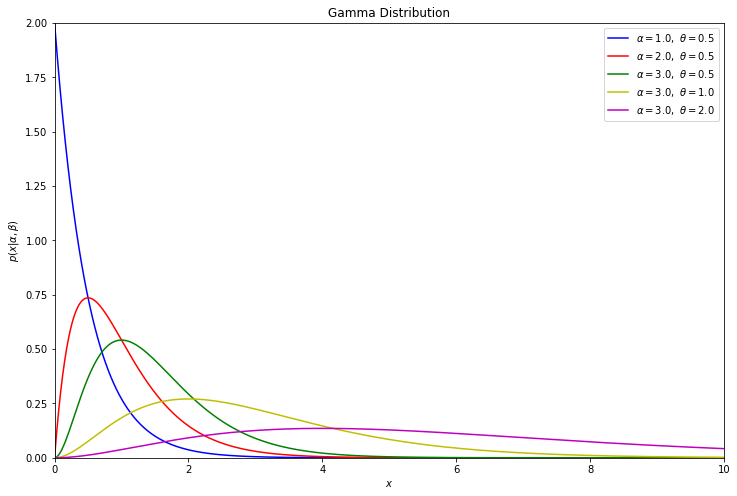

In [3]:
import numpy as np
from scipy.stats import gamma
from matplotlib import pyplot as plt

alpha_values = [1, 2, 3, 3, 3]
beta_values = [0.5, 0.5, 0.5, 1, 2]
color = ['b','r','g','y','m']
x = np.linspace(1E-6, 10, 1000)

fig, ax = plt.subplots(figsize=(12, 8))

for k, t, c in zip(alpha_values, beta_values, color):
    dist = gamma(k, 0, t)
    plt.plot(x, dist.pdf(x), c=c, label=r'$\alpha=%.1f,\ \theta=%.1f$' % (k, t))

plt.xlim(0, 10)
plt.ylim(0, 2)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|\alpha,\beta)$')
plt.title('Gamma Distribution')

plt.legend(loc=0)
plt.show()
